# Task 5: Invoke Bedrock model for code generation

In this notebook, you learn how to use a large language model (LLM) to generate code based on a text prompt.

The prompt used in this notebook is a zero-shot prompt, as we are not providing any examples of text other than the prompt itself.

To demonstrate the code generation capability of models in Amazon Bedrock, you take the use case of code generation. You explore using the Boto3 client to communicate with the Amazon Bedrock API and provide the API with an input consisting of a task, an instruction and an input for the model under the hood to generate an output without providing any additional example. The purpose here is to demonstrate how the powerful LLMs easily understand the task at hand and generate compelling outputs.

<i aria-hidden="true" class="fas fa-sticky-note" style="color:#563377"></i> **Note:** This notebook should work well with the **`Data Science 3.0`** kernel in SageMaker Studio.


## Scenario

You are Moe, a Data Analyst, at AnyCompany. The company wants to understand its sales performance for different products over the past year. You have been provided a dataset named sales.csv. The dataset contains the following columns:

- Date (YYYY-MM-DD) format
- Product_ID (unique identifer for each product)
- Price (price at which each product was sold)


In this notebook, you learn how to generate code for a given prompt. You use the Meta LLama 3 using the Amazon Bedrock API with Boto3 client.

## Task 5.1: Environment setup

In this task, you set up your environment.


In [2]:
#create a service client by name using the default session.
import json
import os
import sys

import boto3

module_path = ".."
sys.path.append(os.path.abspath(module_path))
bedrock_client = boto3.client('bedrock-runtime',region_name=os.environ.get("AWS_DEFAULT_REGION", None))


## Task 5.2: Code Generation

In this task, you prepare an input for the Amazon Bedrock service to generate python program for your use-case.

#### Lab setup - create sample sales.csv data for this lab.



In [3]:
# create sales.csv file
import csv

data = [
    ["date", "product_id", "price", "units_sold"],
    ["2023-01-01", "P001", 50, 20],
    ["2023-01-02", "P002", 60, 15],
    ["2023-01-03", "P001", 50, 18],
    ["2023-01-04", "P003", 70, 30],
    ["2023-01-05", "P001", 50, 25],
    ["2023-01-06", "P002", 60, 22],
    ["2023-01-07", "P003", 70, 24],
    ["2023-01-08", "P001", 50, 28],
    ["2023-01-09", "P002", 60, 17],
    ["2023-01-10", "P003", 70, 29],
    ["2023-02-11", "P001", 50, 23],
    ["2023-02-12", "P002", 60, 19],
    ["2023-02-13", "P001", 50, 21],
    ["2023-02-14", "P003", 70, 31],
    ["2023-03-15", "P001", 50, 26],
    ["2023-03-16", "P002", 60, 20],
    ["2023-03-17", "P003", 70, 33],
    ["2023-04-18", "P001", 50, 27],
    ["2023-04-19", "P002", 60, 18],
    ["2023-04-20", "P003", 70, 32],
    ["2023-04-21", "P001", 50, 22],
    ["2023-04-22", "P002", 60, 16],
    ["2023-04-23", "P003", 70, 34],
    ["2023-05-24", "P001", 50, 24],
    ["2023-05-25", "P002", 60, 21]
]

# Write data to sales.csv
with open('sales.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

print("sales.csv has been created!")

sales.csv has been created!


## Task 5.3: Analyzing sales with Amazon Bedrock generated Python program

In [4]:
# define prompt template
from langchain_core.prompts import PromptTemplate

def format_prompt(actor:str, input:str):
    match actor:
        case "user":
            prompt_template =  """<|begin_of_text|><|start_header_id|>{actor}<|end_header_id|>\n\n{input}<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\n
"""
            prompt = PromptTemplate.from_template(prompt_template)
            return prompt.format(actor=actor,input=input)
        case _:
            print("requested actor >" + actor + "< is not supported")
            return ""    

In [5]:
# Create the prompt
# Analyzing sales

prompt_data = """

You have a CSV, sales.csv, with columns:
- date (YYYY-MM-DD)
- product_id
- price
- units_sold

Create a python program to analyze the sales data from a CSV file. The program should be able to read the data, and determine below:

- Total revenue for the year
- Total revenue by product 
- The product with the highest revenue 
- The date with the highest revenue and the revenue achieved on that date
- Visualize monthly sales using a bar chart

Ensure the code is syntactically correct, bug-free, optimized, not span multiple lines unnessarily, and prefer to use standard libraries. Return only python code without any surrounding text, explanation or context.

"""
prompt=format_prompt("user",prompt_data)

In [6]:
body = json.dumps({
    "prompt": prompt,
    "max_gen_len": 2048,
    "temperature": 0,
    "top_p": 1,
    }) 
    

## Task 5.4: Invoke the model

In [7]:
modelId = "meta.llama3-8b-instruct-v1:0"
response = bedrock_client.invoke_model(body=body, modelId=modelId)
response_body = json.loads(response.get('body').read())
output_list = response_body.get("generation", [])
print(output_list)

```
import csv
import datetime
import matplotlib.pyplot as plt
from collections import defaultdict

def analyze_sales(file_name):
    sales_data = []
    with open(file_name, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            sales_data.append({
                'date': datetime.datetime.strptime(row['date'], '%Y-%m-%d').date(),
                'product_id': row['product_id'],
                'price': float(row['price']),
                'units_sold': int(row['units_sold'])
            })

    total_revenue = sum(sale['price'] * sale['units_sold'] for sale in sales_data)
    print(f'Total revenue for the year: {total_revenue}')

    revenue_by_product = defaultdict(int)
    for sale in sales_data:
        revenue_by_product[sale['product_id']] += sale['price'] * sale['units_sold']
    print('Total revenue by product:')
    for product, revenue in revenue_by_product.items():
        print(f'Product {product}: {revenue}')

    max_revenue_product = 

##### <i aria-hidden="true" class="far fa-copy"></i> (Optional) Copy the generated code from the printed output and run the Bedrock generated code in the cell below for validation.

Total revenue for the year: 35490.0
Total revenue by product:
Product P001: 11700.0
Product P002: 8880.0
Product P003: 14910.0
The product with the highest revenue: P003
The date with the highest revenue: 2023-04-23, Revenue: 2380.0


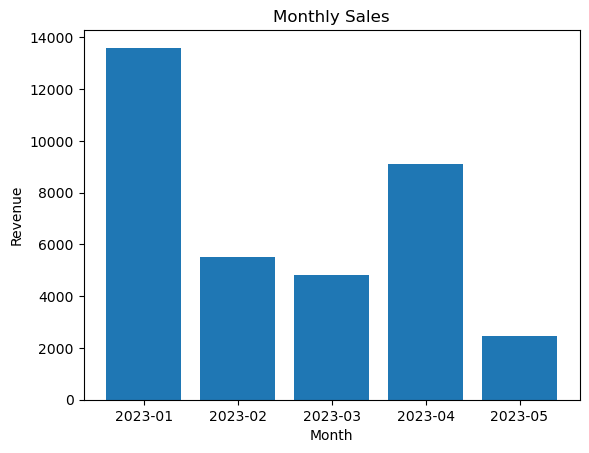

In [9]:
import csv
import datetime
import matplotlib.pyplot as plt
from collections import defaultdict

def analyze_sales(file_name):
    sales_data = []
    with open(file_name, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            sales_data.append({
                'date': datetime.datetime.strptime(row['date'], '%Y-%m-%d').date(),
                'product_id': row['product_id'],
                'price': float(row['price']),
                'units_sold': int(row['units_sold'])
            })

    total_revenue = sum(sale['price'] * sale['units_sold'] for sale in sales_data)
    print(f'Total revenue for the year: {total_revenue}')

    revenue_by_product = defaultdict(int)
    for sale in sales_data:
        revenue_by_product[sale['product_id']] += sale['price'] * sale['units_sold']
    print('Total revenue by product:')
    for product, revenue in revenue_by_product.items():
        print(f'Product {product}: {revenue}')

    max_revenue_product = max(revenue_by_product, key=revenue_by_product.get)
    print(f'The product with the highest revenue: {max_revenue_product}')

    max_revenue_date = max(sales_data, key=lambda x: x['price'] * x['units_sold'])
    print(f'The date with the highest revenue: {max_revenue_date["date"]}, Revenue: {max_revenue_date["price"] * max_revenue_date["units_sold"]}')

    monthly_sales = defaultdict(int)
    for sale in sales_data:
        monthly_sales[sale['date'].strftime('%Y-%m')] += sale['price'] * sale['units_sold']
    months = list(monthly_sales.keys())
    months.sort()
    plt.bar(months, [monthly_sales[month] for month in months])
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.title('Monthly Sales')
    plt.show()

analyze_sales('sales.csv')



You have now experimented with using `boto3` SDK which provides a vanilla exposure to Amazon Bedrock API. Using this API you generate a python program to analyze and visualize given sales data.



### Try it yourself

- Change the prompts to your specific usecase and evaluate the output of different models.
- Play with the token length to understand the latency and responsiveness of the service.
- Apply different prompt engineering principles to get better outputs.

### Cleanup

You have completed this notebook. To move to the next part of the lab, do the following:

- Close this notebook file and continue with the **Task6**